## Final Project Submission

Please fill out:
* Student name: Sylvia Sarange Manono
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Samuel G. Mwangi
* Blog post URL:

# Microsoft Movie Venture

Author: Sylvia Sarange Manono

## Overview

The goal of this project is to perform exploratory data analysis on movie data to provide insights that can help guide Microsoft's new movie studio on what types of films to produce.

## Business Problem

With more and more movie studios opting to distribute their content on their own platforms, successful entertainment companies today are increasingly dependent on original content. Additionally, major tech companies like Netflix, Amazon, and Apple have been investing heavily in creating original video content.For instance, at its inception, Netflix, one of the pioneer movie streaming sites rose to popularity by distributing content licensed from established movie studios. However, with the growing demand for streaming services, these studios established their own streaming platforms, forcing Netflix to invest heavily in its own content.  

Microsoft has decided to follow suit by establishing a new movie studio division. However, Microsoft has little prior experience in the movie production business. To assist in defining the strategic direction for the new studio, data-driven insights are needed on current box office trends and successful movie genres, styles, and so on. This project seeks to provide actionable insights from explortatory data analysis to inform Microsoft's decision and ensure the venture is successful and profitable.

## Data

Movie datasets are obtained

Movie datasets are obtained from the following two sources:

1. im.db
2. tn.movie_budgets.csv

## Library Importation

In [44]:
# Importing the necessary libraries and modules
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [45]:
import os
import sqlite3
import pandas as pd

In [46]:
# Creating a path

imdb_path = os.path.join('im.db')

In [47]:
# Opening a connection and initializing a cursor

conn = sqlite3.connect('im.db')
cursor = conn.cursor()

The database has various tables, but the ones that are of interest in this case are 'movie_basics' and 'movie_ratings'.

In [48]:
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names


### Reading the budget csv file

In [49]:
# Reading the bom.movies csv file and displaying the first two entries
bomovies_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bomovies_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [50]:
# Reding the movie budgets csv file and displaying the first two entries
movie_budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [51]:
movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

## Data Preparation

**a.  Combining the relevant tables in the IMDB database**

I combined the 'movie_basics' and 'movie_ratings' tables by executing thr following SQL command in DB Browser for SQLite. By oding so, I ensured that the data contained in the megerd table was complete with no null values.

SELECT *
FROM movie_basics INNER JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id

**b. Checking for null values in the budgets file**

In [52]:
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no null values in this file

**c. Checking the column data types**

In [53]:
movie_budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

It seems the data in all columns are strings. Since we would like the production, domestic and worldwide gross amounts to be integers, we convert the (str) to (int) as follows:

In [56]:
movie_budgets_df["production_budget"] = movie_budgets_df["production_budget"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["worldwide_gross"] = movie_budgets_df["worldwide_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["domestic_gross"] = movie_budgets_df["domestic_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08


Additionally, we would like to compare movie release years to track annual trends. This information could be useful in assessing the cyclical (if any) trends in preferred genres.

In [57]:
movie_budgets_df['release_date'] = movie_budgets_df['release_date'].str[-4:]
movie_budgets_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,2007,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,2017,Justice League,300000000.0,229024295.0,6.559452e+08
9,10,2015,Spectre,300000000.0,200074175.0,8.796209e+08


## Data Analysis

## High-grossing Movie Budgets

At this stage, I'm working with the hypothesis that production budgets are proportional to wordwide gross income. I will prove or disprove this hypothesis using a scatter plot to establish corelation.

In [65]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


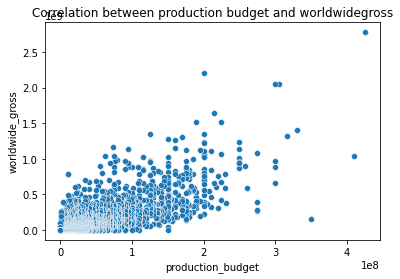

In [66]:
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budgets_df).set(title='Correlation between production budget and worldwidegross')

plt.show()

##Highest Grossing Movie Budgets

In [67]:
df6=movie_budgets_df.nlargest (n=20, columns='worldwide_gross')
df6 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
42,43,1997,Titanic,200000000.0,659363944.0,2.208208e+09
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,34,2015,Jurassic World,215000000.0,652270625.0,1.648855e+09
66,67,2015,Furious 7,190000000.0,353007020.0,1.518723e+09
26,27,2012,The Avengers,225000000.0,623279547.0,1.517936e+09
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
41,42,2018,Black Panther,200000000.0,700059566.0,1.348258e+09
260,61,2011,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09


In [76]:
df7=movie_budgets_df.nlargest (n=10, columns='production_budget')
df7 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,2007,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,2017,Justice League,300000000.0,229024295.0,6.559452e+08
9,10,2015,Spectre,300000000.0,200074175.0,8.796209e+08


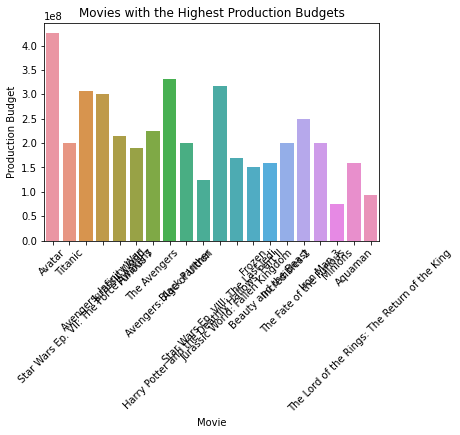

In [80]:
sns.barplot(x='movie', y='production_budget', data=df6)
plt.xticks(rotation=45)
plt.title('Movies with the Highest Production Budgets')
plt.xlabel('Movie')
plt.ylabel('Production Budget')
plt.show()

c:\Users\bijou\newanaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\bijou\newanaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\bijou\newanaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\bijou\newanaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


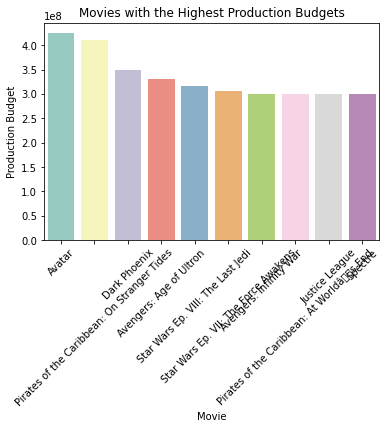

In [79]:
sns.barplot(x='movie', y='production_budget', data=df7, palette="Set3")
plt.xticks(rotation=45)
plt.title('Movies with the Highest Production Budgets')
plt.xlabel('Movie')
plt.ylabel('Production Budget')
plt.show()